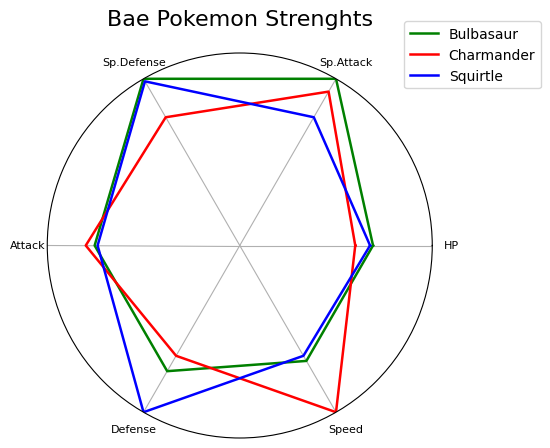

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
pokemon_data = pd.ExcelFile('pokemon.xlsx')
pokemon_stats = pokemon_data.parse('Pokemon')  # Parse the 'Pokemon' sheet

# Filter the data for specific Pokémon
bulbasaur_stats = pokemon_stats[pokemon_stats['Name'].str.strip() == 'Bulbasaur']
charmander_stats = pokemon_stats[pokemon_stats['Name'].str.strip() == 'Charmander']
squirtle_stats = pokemon_stats[pokemon_stats['Name'].str.strip() == 'Squirtle']

# Extract the relevant stats
categories = ['HP', 'Sp.Attack', 'Sp.Defense', 'Attack', 'Defense',  'Speed']
values_bulb = bulbasaur_stats[categories].values.flatten()
values_charm = charmander_stats[categories].values.flatten()
values_squirt = squirtle_stats[categories].values.flatten()

# Repeat the first value to close the radar chart
values_bulb = np.append(values_bulb, values_bulb[0])
values_charm = np.append(values_charm, values_charm[0])
values_squirt = np.append(values_squirt, values_squirt[0])
angles = np.linspace(0, 2 * np.pi, len(categories) + 1, endpoint=True)

# Create the radar chart
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values_bulb, linewidth=1.8, linestyle='solid', label='Bulbasaur', color='green')
ax.plot(angles, values_charm, linewidth=1.8, linestyle='solid', label='Charmander', color = 'red')
ax.plot(angles, values_squirt, linewidth=1.8, linestyle='solid', label='Squirtle', color = 'blue')

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=8)

# Shrink the circle
ax.set_ylim(0, max(max(values_bulb), max(values_charm), max(values_squirt)))

# Add a title
plt.title('Bae Pokemon Strenghts', size=16, pad=20)
ax.set_yticks([])  # Remove radial gridlines for simplicity

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()
